In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scripts.analysis_data_scripts.data_preprocessor import rename_columns

# Load the main dataset and CATE predictions
dataset = pd.read_csv('../../data/analysis_data/dataset.csv')
data = rename_columns(dataset)
s_predictions = pd.read_csv('../../results/analysis_data_results/test_data/s_predictions.csv')
t_predictions = pd.read_csv('../../results/analysis_data_results/test_data/t_predictions.csv')
x_predictions = pd.read_csv('../../results/analysis_data_results/test_data/x_predictions.csv')
r_predictions = pd.read_csv('../../results/analysis_data_results/test_data/r_predictions.csv')
s_predictions.head()

,PreInterventionFixedMindset,SchoolAchievementLevel,SchoolMinorityComposition,PovertyConcentration,TotalStudentPopulation,schoolid,StudentRaceEthnicity,StudentGender,FirstGenCollegeStatus,SchoolUrbanicity,treatment,s_CATE
0,-0.439024,0.638664,-0.447305,-0.134067,0.197014,7.0,13.0,1.0,1.0,1.0,0,0.002753
1,-0.509044,-0.245513,-1.275983,-0.005205,-1.004449,5.0,4.0,2.0,0.0,1.0,1,-0.001241
2,-0.214474,1.362762,-1.056557,-1.082470,0.348322,6.0,4.0,2.0,1.0,2.0,0,0.000319
3,-0.326688,1.290629,-0.763398,-1.160290,0.831021,6.0,1.0,2.0,0.0,2.0,1,-0.000936
4,0.254433,-0.187237,1.333675,-0.307735,0.375201,5.0,2.0,2.0,1.0,4.0,0,0.000013


In [6]:
# Combine all CATE predictions with the dataset
data['s_CATE'] = s_predictions['s_CATE']
data['t_CATE'] = t_predictions['t_CATE']
data['x_CATE'] = x_predictions['x_CATE']
data['r_CATE'] = r_predictions['r_CATE']

In [7]:
# Create interaction terms
data['S3_X2'] = data['PreInterventionFixedMindset'] * data['SchoolAchievementLevel']
data['C1_XC'] = data['StudentRaceEthnicity'] * data['SchoolUrbanicity']

# Select relevant variables for analysis
interaction_terms = ['S3_X2', 'C1_XC']

In [8]:
import statsmodels.api as sm

# Analyze interaction effects for each meta-learner
for learner in ['s_CATE', 't_CATE', 'x_CATE', 'r_CATE']:
    formula = f"{learner} ~ PreInterventionFixedMindset + SchoolAchievementLevel + StudentRaceEthnicity + SchoolUrbanicity + S3_X2 + C1_XC"
    model = sm.OLS.from_formula(formula, data).fit()
    print(f"Results for {learner}:")
    print(model.summary())


Results for s_CATE:
                            OLS Regression Results                            
Dep. Variable:                 s_CATE   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.7119
Date:                Thu, 26 Dec 2024   Prob (F-statistic):              0.640
Time:                        14:43:14   Log-Likelihood:                 11387.
No. Observations:                2079   AIC:                        -2.276e+04
Df Residuals:                    2072   BIC:                        -2.272e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

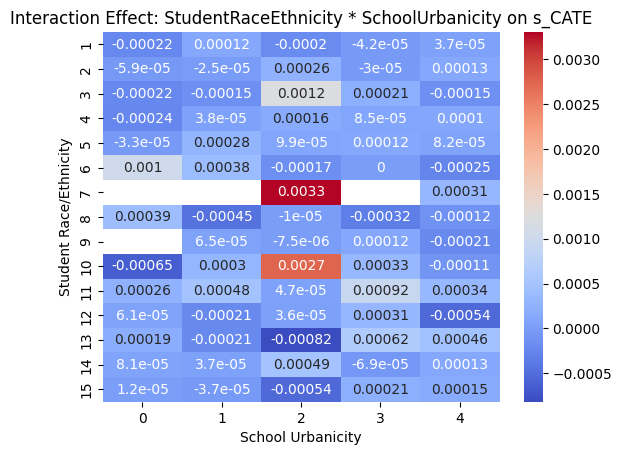

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap for interaction: C1_XC vs s_CATE
pivot_table = data.pivot_table(values='s_CATE', index='StudentRaceEthnicity', columns='SchoolUrbanicity', aggfunc='mean')
sns.heatmap(pivot_table, cmap='coolwarm', annot=True)
plt.title('Interaction Effect: StudentRaceEthnicity * SchoolUrbanicity on s_CATE')
plt.xlabel('School Urbanicity')
plt.ylabel('Student Race/Ethnicity')
plt.show()


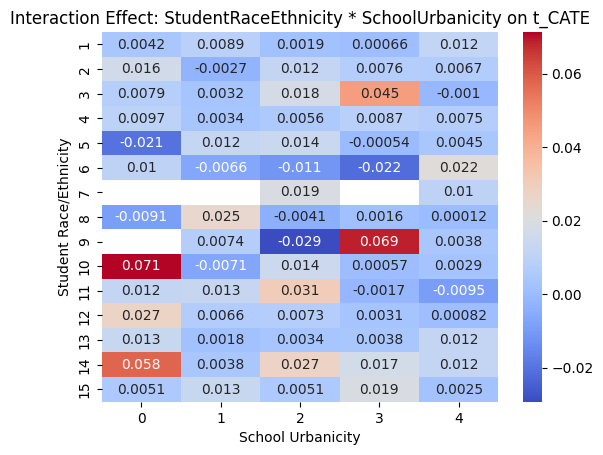

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap for interaction: C1_XC vs t_CATE
pivot_table = data.pivot_table(values='t_CATE', index='StudentRaceEthnicity', columns='SchoolUrbanicity', aggfunc='mean')
sns.heatmap(pivot_table, cmap='coolwarm', annot=True)
plt.title('Interaction Effect: StudentRaceEthnicity * SchoolUrbanicity on t_CATE')
plt.xlabel('School Urbanicity')
plt.ylabel('Student Race/Ethnicity')
plt.show()


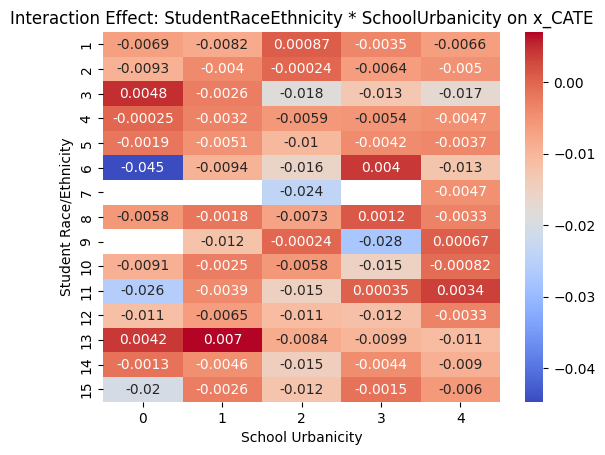

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap for interaction: C1_XC vs x_CATE
pivot_table = data.pivot_table(values='x_CATE', index='StudentRaceEthnicity', columns='SchoolUrbanicity', aggfunc='mean')
sns.heatmap(pivot_table, cmap='coolwarm', annot=True)
plt.title('Interaction Effect: StudentRaceEthnicity * SchoolUrbanicity on x_CATE')
plt.xlabel('School Urbanicity')
plt.ylabel('Student Race/Ethnicity')
plt.show()


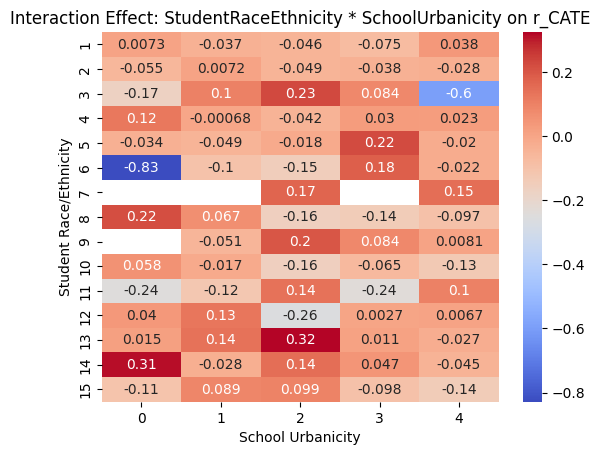

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap for interaction: C1_XC vs r_CATE
pivot_table = data.pivot_table(values='r_CATE', index='StudentRaceEthnicity', columns='SchoolUrbanicity', aggfunc='mean')
sns.heatmap(pivot_table, cmap='coolwarm', annot=True)
plt.title('Interaction Effect: StudentRaceEthnicity * SchoolUrbanicity on r_CATE')
plt.xlabel('School Urbanicity')
plt.ylabel('Student Race/Ethnicity')
plt.show()
